In [637]:
# Read the file into a dataframe
import pandas as pd
df = pd.read_csv ("/Users/carlos/Desktop/0313covid19.csv")

In [638]:
# Extricate the regional observations from the global DF
us = df[df['Country/Region'].str.contains("US", na=False)]
china = df[df['Country/Region'].str.contains("China", na=False)]
canada = df[df['Country/Region'].str.contains("Canada", na=False)]
australia = df[df['Country/Region'].str.contains("Australia", na=False)]
uk = df[df['Country/Region'].str.contains("United Kingdom", na=False)]
france = df[df['Country/Region'].str.contains("France", na=False)]
denmark = df[df['Country/Region'].str.contains("Denmark", na=False)]

In [639]:
# Get rid of the nonUnique Countries in the df (to be appended after they are combined to a single observation)
compliment = df[~df['Country/Region'].str.contains("China|US|Canada|Australia|United Kingdom|France|Denmark", na=False)]
# The compliment df has unique values for all remaining countries
compliment['Country/Region'].value_counts()

Cote d'Ivoire    1
Indonesia        1
Iceland          1
Tunisia          1
Ireland          1
                ..
Mexico           1
Israel           1
Monaco           1
Jamaica          1
Georgia          1
Name: Country/Region, Length: 109, dtype: int64

In [607]:
# Get the sum of all observations in the data frame
## Becareful not to rerun the same cells- because they will continue to append row sums

# Find the average location markers
c1 = canada['Lat'].mean(axis=0)
c2 = canada['Long'].mean(axis=0)
# Get a vector of the sums and add it as a row in the dataframe
canada = canada.append(canada.sum(numeric_only = True), ignore_index = True)
# Set the nonnumerical elements to an appropriate value
canada.loc[canada.index[-1], 'Country/Region'] = "Canada"
canada.loc[canada.index[-1], 'Lat'] = c1 
canada.loc[canada.index[-1], 'Long'] = c2

# Do the same for China, US, and Australia
c1 = china['Lat'].mean(axis=0)
c2 = china['Long'].mean(axis=0)
china = china.append(china.sum(numeric_only = True), ignore_index = True)
china.loc[china.index[-1], 'Country/Region'] = "China"
china.loc[china.index[-1], 'Lat'] = c1 
china.loc[china.index[-1], 'Long'] = c2

c1 = us['Lat'].mean(axis=0)
c2 = us['Long'].mean(axis=0)
us = us.append(us.sum(numeric_only = True), ignore_index = True)
us.loc[us.index[-1], 'Country/Region'] = "US"
us.loc[us.index[-1], 'Lat'] = c1 
us.loc[us.index[-1], 'Long'] = c2

c1 = australia['Lat'].mean(axis=0)
c2 = australia['Long'].mean(axis=0)
australia = australia.append(australia.sum(numeric_only = True), ignore_index = True)
australia.loc[australia.index[-1], 'Country/Region'] = "Australia"
australia.loc[australia.index[-1], 'Lat'] = c1
australia.loc[australia.index[-1], 'Long'] = c2

c1 = uk['Lat'].mean(axis=0)
c2 = uk['Long'].mean(axis=0)
uk = uk.append(uk.sum(numeric_only = True), ignore_index = True)
uk.loc[uk.index[-1], 'Country/Region'] = "United Kingdom"
uk.loc[uk.index[-1], 'Lat'] = c1 
uk.loc[uk.index[-1], 'Long'] = c2

c1 = france['Lat'].mean(axis=0)
c2 = france['Long'].mean(axis=0)
france = france.append(france.sum(numeric_only = True), ignore_index = True)
france.loc[france.index[-1], 'Country/Region'] = "US"
france.loc[france.index[-1], 'Lat'] = c1 
france.loc[france.index[-1], 'Long'] = c2

c1 = denmark['Lat'].mean(axis=0)
c2 = denmark['Long'].mean(axis=0)
denmark = denmark.append(denmark.sum(numeric_only = True), ignore_index = True)
denmark.loc[denmark.index[-1], 'Country/Region'] = "US"
denmark.loc[denmark.index[-1], 'Lat'] = c1 
denmark.loc[denmark.index[-1], 'Long'] = c2

In [629]:
# The compliment df has unique values for all remaining countries
compliment['Country/Region'].value_counts()

# Add all of the countries back into the dataframe with the unique countries.
compliment = compliment.append(us.loc[us.index[-1]])
compliment = compliment.append(china.loc[china.index[-1]])
compliment = compliment.append(canada.loc[canada.index[-1]])
compliment = compliment.append(australia.loc[australia.index[-1]])
compliment = compliment.append(uk.loc[uk.index[-1]])
compliment = compliment.append(france.loc[france.index[-1]])
compliment = compliment.append(denmark.loc[denmark.index[-1]])

In [630]:
# Sort the values by the highest numnber of recent cases
compliment.sort_values(by =['3/12/20'], inplace = True, ascending=False)
compliment.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
16,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462
157,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075
158,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869
18,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,165,222,259,400,500,673,1073,1695,2277,2277
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,196,262,482,670,799,1040,1176,1457,1908,2078
39,NaN,Norway,60.4720,8.4689,0,0,0,0,0,0,...,32,56,87,108,147,176,205,400,598,702
167,Diamond Princess,Cruise Ship,35.4437,139.6380,0,0,0,0,0,0,...,706,706,706,696,696,696,696,696,696,696
31,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,56,90,114,214,268,337,374,491,652,652
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,293,331,360,420,461,502,511,581,639,639
17,NaN,Sweden,63.0000,16.0000,0,0,0,0,0,0,...,21,35,94,101,161,203,248,355,500,599


In [631]:
# Clean up the dataframe
compliment = compliment.drop(columns=['Province/State'])
compliment.loc[compliment['Country/Region'] == "Others",  'Country/Region'] = "Cruise"

In [632]:
# Get a vector of the sum
globalSum = compliment.append( compliment.sum(numeric_only = True), ignore_index = True)
globalSum.loc[globalSum.index[-1], 'Country/Region'] = "Global"
globalSum.loc[globalSum.index[-1], 'Lat'] = 0 
globalSum.loc[globalSum.index[-1], 'Long'] = 0
globalSum.tail(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
107,Cote d'Ivoire,7.5400,-5.5471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
108,Congo (Kinshasa),-4.0383,21.7587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
109,Liechtenstein,47.1400,9.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
110,Ukraine,48.3794,31.1656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
111,Jordan,31.2400,36.5100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
112,Togo,8.6195,0.8248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
113,Holy See,41.9029,12.4534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
114,Nepal,28.1667,84.2500,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
115,US,39.5393,-75.6674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,Global,0.0000,0.0000,6.0,9.0,17.0,23.0,30.0,36.0,53.0,...,12132.0,14122.0,16536.0,19885.0,23355.0,26881.0,30329.0,34131.0,40247.0,42150.0


In [633]:
import numpy as np
gCols = globalSum.columns.values

world = pd.melt(globalSum, id_vars=['Country/Region'], value_vars=gCol, var_name = 'Date', value_name = 'Cases')
world.head(10)

,Country/Region,Date,Cases
0,Italy,1/22/20,0.0
1,Iran,1/22/20,0.0
2,"Korea, South",1/22/20,1.0
3,Spain,1/22/20,0.0
4,Germany,1/22/20,0.0
5,Norway,1/22/20,0.0
6,Cruise Ship,1/22/20,0.0
7,Switzerland,1/22/20,0.0
8,Japan,1/22/20,2.0
9,Sweden,1/22/20,0.0


/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


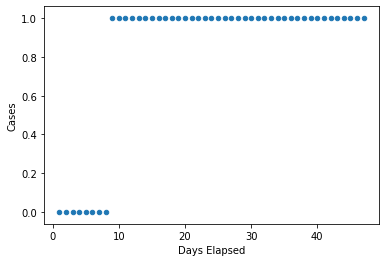

In [634]:
china = world[world['Country/Region'].str.contains("China", na=False)]
listCount = [x for x in range(1, china.shape[0]+1)]
china['Days Elapsed'] = listCount
chinaPlot = china.plot.scatter(x='Days Elapsed', y='Cases')

/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


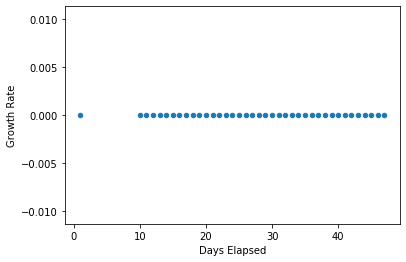

In [635]:
china['Growth Rate'] = china['Cases'].pct_change().mul(100).round(3)
china.loc[china.index[0], 'Growth Rate'] = 0 
chinaGrowthPlot = china.plot.scatter(x='Days Elapsed', y='Growth Rate')

In [615]:
china.head(80)

,Country/Region,Date,Cases,Days Elapsed,Growth Rate
0,China,1/22/20,548.0,1,0.000
117,China,1/23/20,643.0,2,17.336
234,China,1/24/20,920.0,3,43.079
351,China,1/25/20,1406.0,4,52.826
468,China,1/26/20,2075.0,5,47.582
585,China,1/27/20,2877.0,6,38.651
702,China,1/28/20,5509.0,7,91.484
819,China,1/29/20,6087.0,8,10.492
936,China,1/30/20,8141.0,9,33.744
1053,China,1/31/20,9802.0,10,20.403


/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


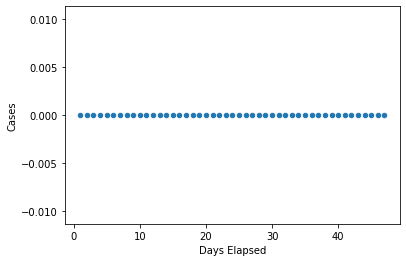

In [636]:
us = world[world['Country/Region'].str.contains("US", na=False)]
listCount = [x for x in range(1, us.shape[0]+1)]
us['Days Elapsed'] = listCount
usPlot = us.plot.scatter(x='Days Elapsed', y='Cases')

/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


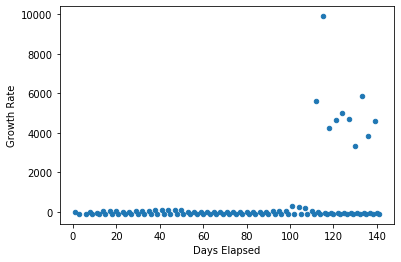

In [617]:
us['Growth Rate'] = us['Cases'].pct_change().mul(100).round(3)
us.loc[us.index[0], 'Growth Rate'] = 0 
usGrowthPlot = us.plot.scatter(x='Days Elapsed', y='Growth Rate')

In [625]:
us.tail(10)

,Country/Region,Date,Cases,Days Elapsed,Growth Rate
5043,US,3/5/20,11.0,132,-94.931
5152,US,3/6/20,656.0,133,5863.636
5155,US,3/6/20,262.0,134,-60.061
5160,US,3/6/20,24.0,135,-90.840
5269,US,3/7/20,952.0,136,3866.667
5272,US,3/7/20,402.0,137,-57.773
5277,US,3/7/20,24.0,138,-94.030
5386,US,3/8/20,1129.0,139,4604.167
5389,US,3/8/20,518.0,140,-54.119
5394,US,3/8/20,37.0,141,-92.857


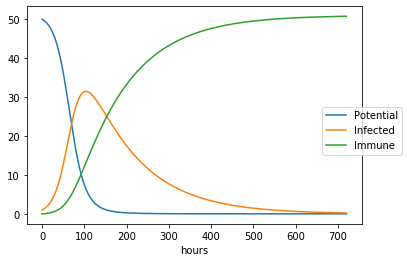

In [642]:
from numpy import zeros, linspace
import seaborn as sns 
import matplotlib.pyplot as plt

# Given Conditions
# What happens to virulence within a closed system?
# 10 people were infected in 24 hours - there were initially 40 people and 8 infected   
virulence = 10./(40*8*24)
# of the 15 infected, 3 recovered in 24 hours
cureRate = 3./(15*24)

# Simulation Duration
delta = 0.1
timePeriod = 30
simulationEnd = int(timePeriod*24/dt)

# Declare the size of the array and simulation space
time = linspace(0, simulationEnd*delta, simulationEnd+1)
Potential = zeros( simulationEnd+1)
Infected = zeros( simulationEnd+1)
Recovered = zeros( simulationEnd+1)

# Setup the initial conditions
Potential[0] = 50
Infected[0] = 1
Recovered[0] = 0

for today in range( simulationEnd ):
    tomorrow = today+1
    newInfections = delta * virulence * Potential[today]*Infected[today]
    newRecoveries = delta * cureRate * Infected[today]
    
    Potential[tomorrow] = Potential[today] - newInfections
    Infected[tomorrow] = Infected[today] + newInfections - newRecoveries
    Recovered[tomorrow] = Recovered[today] + newRecoveries

fig = plt.figure()
l1, l2, l3 = plt.plot(time, Potential, time, Infected, time, Recovered)
fig.legend( (l1, l2, l3), ('Potential', 'Infected', 'Immune'), 'right' )
plt.xlabel('hours')
plt.show()
#plt.savefig('tmp.pdf')